In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.6 MB/s eta 0:00:00


In [2]:
#importing pipeline 
from transformers import pipeline

In [3]:
# Initialising the pipeline with default model
classifier = pipeline('sentiment-analysis')

# Performing sentiment analysis on below text
classifier('Transfer learning can help overcome issues related to over-reliance on data in machine learning')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.908748984336853}]

In [17]:
#Initialising the pipeline with the selected model
classifier = pipeline('sentiment-analysis', model='siebert/sentiment-roberta-large-english')
# Performing sentiment analysis on below text
classifier('We study advanced deep learning. We learned everything')

[{'label': 'POSITIVE', 'score': 0.9967949986457825}]

In [23]:
#Importing required libraries
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [9]:
model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 1s 0us/step


35363/35363 [==============================] - 0s 0us/step


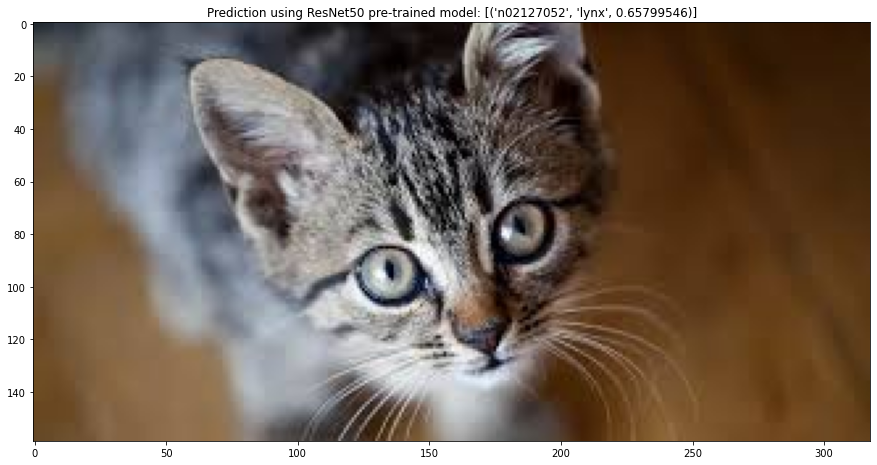

In [24]:
img_path = '/content/cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)

# Showing the image with prediction
plt.figure(figsize=(15,10))
img_bgr = cv2.imread(img_path, 1)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb);
plt.title('Prediction using ResNet50 pre-trained model: {}'.format(decode_predictions(preds, top=1)[0]));